# Quick Transfer Learning with fastai

## Classify Trashies vs Shopkins Toys

In [22]:
from fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
%matplotlib inline

### Path to images

In [23]:
path = Path('/home/jupyter/myDir/fastai/toys/') # contains subdirectories "trashies" and "shopkins", with their images.

### Show some examples

In [24]:
def showExamples(ids):
    fig=plt.figure(figsize=(15, 15))
    for i,j in enumerate(ids):
        image = Image.open(pathToClass/(images[j]))
        fig.add_subplot(1,len(ids),i+1)
        plt.imshow(np.asarray(image))
        plt.axis("off")
    plt.show()

#### Trashies toys

A total of 149 images with trashies toys.


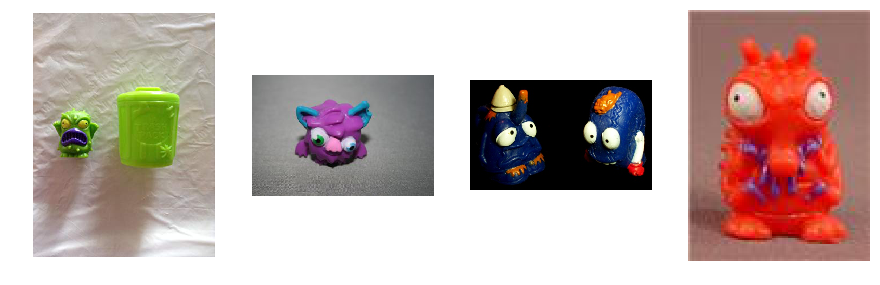

In [25]:
pathToClass = path/'trashies'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with trashies toys.")
showExamples([35,70,105,140])

#### Shopkins toys

A total of 227 images with shopkins toys.


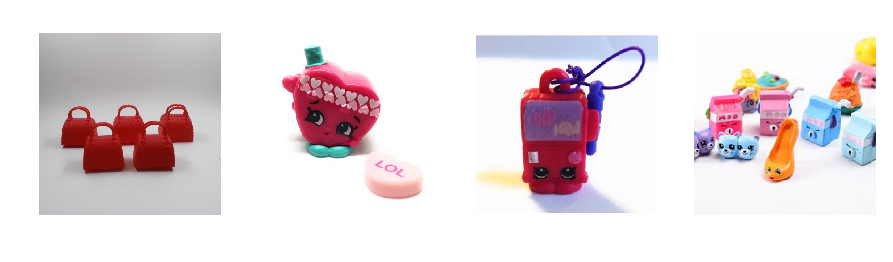

In [26]:
pathToClass = path/'shopkins'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print("A total of", len(images), "images with shopkins toys.")
showExamples([35,70,105,140])

## Read data

- Leave 30% for validation.

- Apply default data augmentation transformations.

In [27]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [28]:
data.classes

['shopkins', 'trashies']

#### Show some images used for training

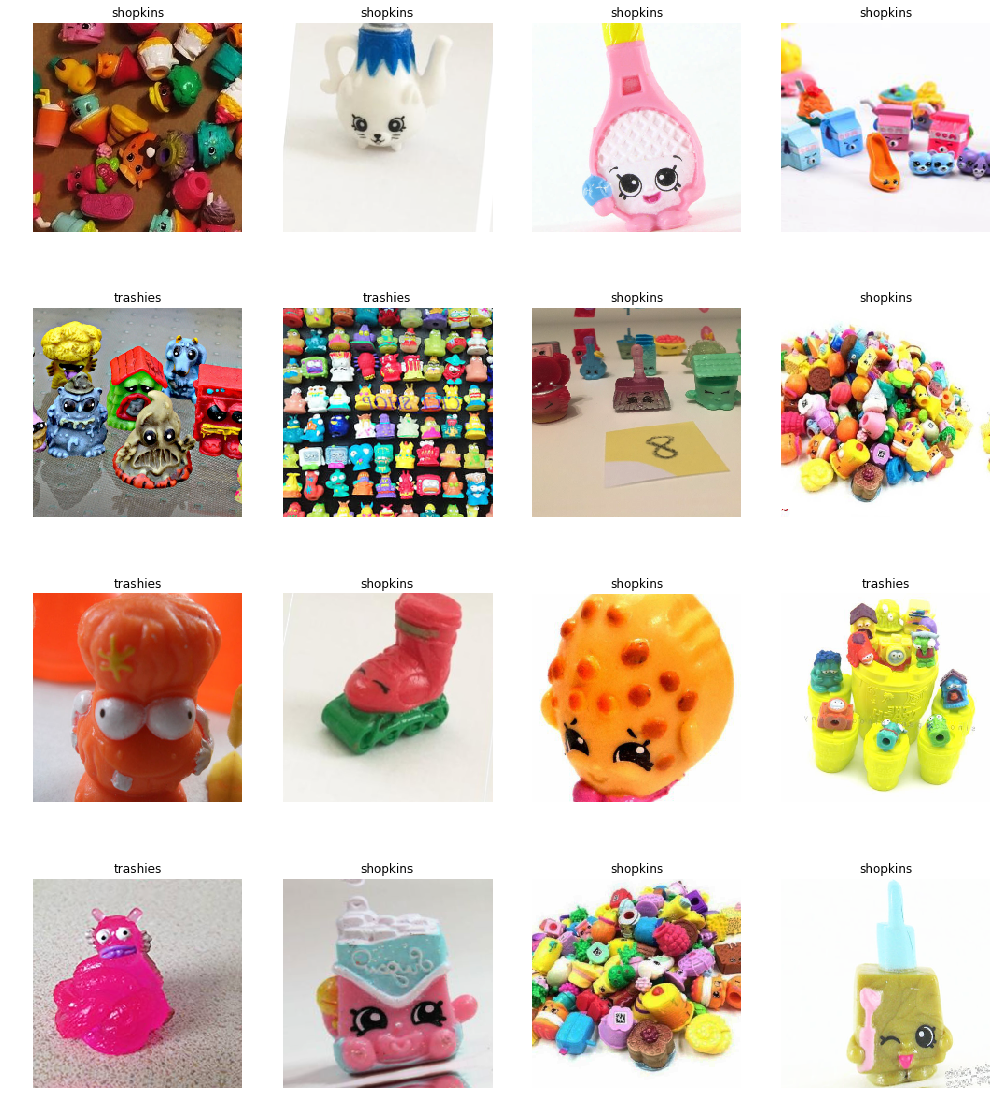

In [29]:
data.show_batch(rows=4, figsize=(14,16)) 

In [30]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 264
Number of examples in validation: 112


## Train model

#### Apply transfer learning using resnet34, tuning the parameters of the last layer.

In [31]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

#### Learn through 10 epochs; error rate is on validation set

In [32]:
learn.fit_one_cycle(10)

Total time: 00:50
epoch  train_loss  valid_loss  error_rate
1      0.815175    0.948907    0.500000    (00:04)
2      0.628044    0.440276    0.250000    (00:05)
3      0.516246    0.242453    0.116071    (00:04)
4      0.468072    0.202785    0.062500    (00:04)
5      0.384959    0.182533    0.071429    (00:04)
6      0.322108    0.164633    0.080357    (00:05)
7      0.287815    0.144084    0.071429    (00:05)
8      0.265354    0.130851    0.053571    (00:05)
9      0.242545    0.140152    0.062500    (00:04)
10     0.215471    0.139119    0.053571    (00:05)



### Error rate on validation: 5.4% (accuracy 94.6%) 

In [33]:
learn.save('toys-1')

In [34]:
#learn.load('toys-1')

## Confusion matrix on the validation set

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

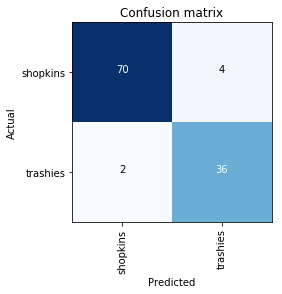

In [36]:
interp.plot_confusion_matrix()

## Cases with highest loss

As shown in the confusion matrix, there are 6 misclassifications. These 6 cases are shown next, along with the prediction made, the actual class, the loss value, and the probability estimated for the correct class. 

Then, 3 more cases with high loss are shown, although they are correctly classified.

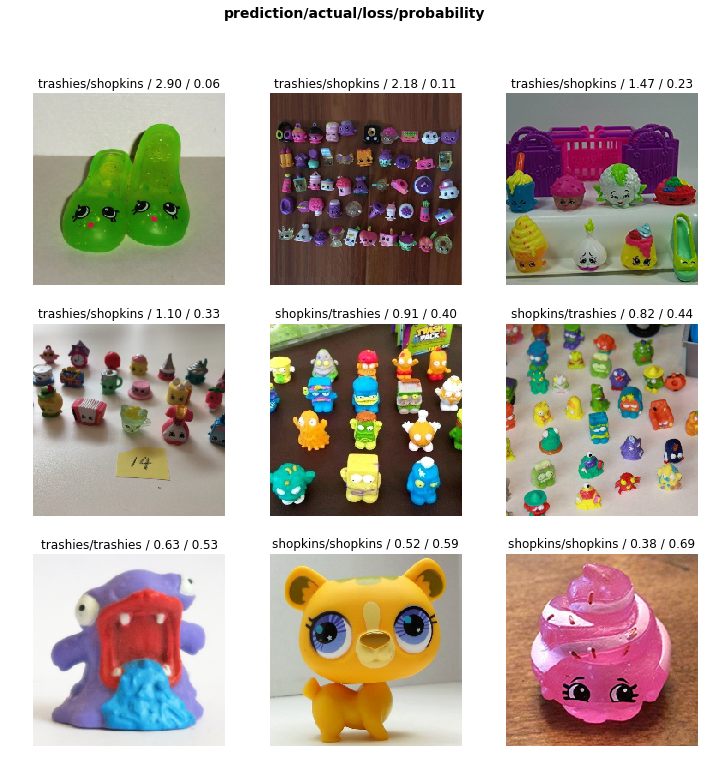

In [38]:
interp.plot_top_losses(9)